**ASSIGNMENT-6**

---



(Gaussian Naïve Bayes Classifier) Implement Gaussian Naïve Bayes
Classifier on the Iris dataset from sklearn.datasets using

(i) Step-by-step implementation

(ii) In-built function

,Model,Accuracy
0,Custom GaussianNB,0.911111
1,sklearn GaussianNB,0.911111


---- Custom GaussianNB ----
Accuracy: 0.9111
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        15
  versicolor     0.8235    0.9333    0.8750        15
   virginica     0.9231    0.8000    0.8571        15

    accuracy                         0.9111        45
   macro avg     0.9155    0.9111    0.9107        45
weighted avg     0.9155    0.9111    0.9107        45


---- sklearn GaussianNB ----
Accuracy: 0.9111
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        15
  versicolor     0.8235    0.9333    0.8750        15
   virginica     0.9231    0.8000    0.8571        15

    accuracy                         0.9111        45
   macro avg     0.9155    0.9111    0.9107        45
weighted avg     0.9155    0.9111    0.91

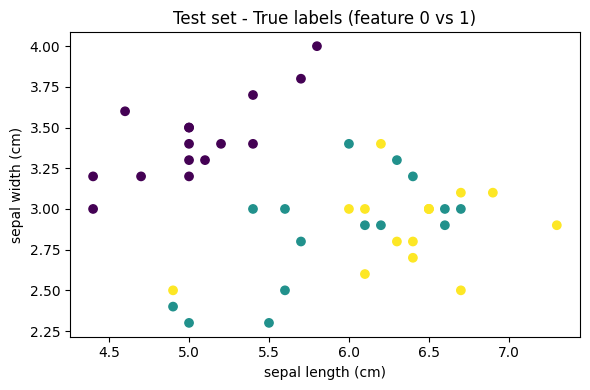

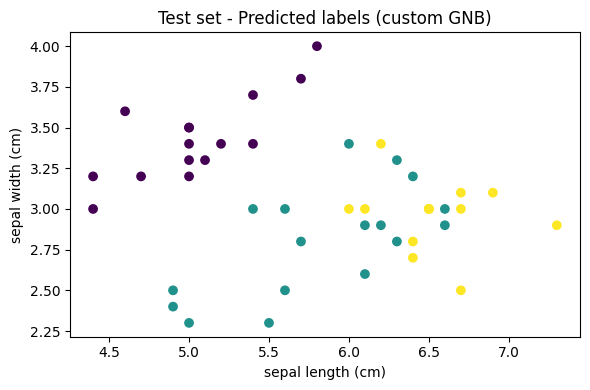

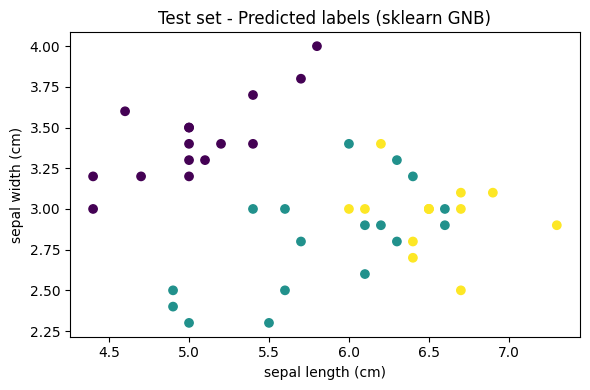

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from IPython.display import display

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def train_gaussian_nb(X, y, var_smoothing=1e-9):
    classes = np.unique(y)
    n_classes = classes.shape[0]
    n_features = X.shape[1]
    means = np.zeros((n_classes, n_features))
    variances = np.zeros((n_classes, n_features))
    class_count = np.zeros(n_classes, dtype=int)
    for idx, c in enumerate(classes):
        X_c = X[y == c]
        class_count[idx] = X_c.shape[0]
        means[idx, :] = X_c.mean(axis=0)
        variances[idx, :] = X_c.var(axis=0) + var_smoothing
    class_priors = class_count / class_count.sum()
    return {"classes": classes, "means": means, "variances": variances, "class_priors": class_priors, "class_count": class_count}

def _gaussian_log_likelihood(x, mean, var):
    return -0.5 * (np.log(2.0 * np.pi * var) + ((x - mean) ** 2) / var).sum(axis=-1)

def predict_gaussian_nb(model, X):
    classes = model["classes"]
    means = model["means"]
    variances = model["variances"]
    priors = model["class_priors"]
    n_samples = X.shape[0]
    n_classes = classes.shape[0]
    log_probs = np.zeros((n_samples, n_classes))
    for idx, c in enumerate(classes):
        log_likelihood = _gaussian_log_likelihood(X, means[idx], variances[idx])
        log_prior = np.log(priors[idx])
        log_probs[:, idx] = log_likelihood + log_prior
    indices = np.argmax(log_probs, axis=1)
    return classes[indices]

model_custom = train_gaussian_nb(X_train, y_train)
y_pred_custom = predict_gaussian_nb(model_custom, X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)
cm_custom = confusion_matrix(y_test, y_pred_custom)
report_custom = classification_report(y_test, y_pred_custom, target_names=target_names, digits=4)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_sklearn = gnb.predict(X_test)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
report_sklearn = classification_report(y_test, y_pred_sklearn, target_names=target_names, digits=4)

results_df = pd.DataFrame({
    "Model": ["Custom GaussianNB", "sklearn GaussianNB"],
    "Accuracy": [acc_custom, acc_sklearn]
})
display(results_df)

print("---- Custom GaussianNB ----")
print(f"Accuracy: {acc_custom:.4f}")
print("Confusion Matrix:\n", cm_custom)
print("Classification Report:\n", report_custom)
print("\n---- sklearn GaussianNB ----")
print(f"Accuracy: {acc_sklearn:.4f}")
print("Confusion Matrix:\n", cm_sklearn)
print("Classification Report:\n", report_sklearn)

plt.figure(figsize=(6,4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title("Test set - True labels (feature 0 vs 1)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_custom)
plt.title("Test set - Predicted labels (custom GNB)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn)
plt.title("Test set - Predicted labels (sklearn GNB)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.tight_layout()
plt.show()

Explore about GridSearchCV toot in scikit-learn. This is a tool that is
often used for tuning hyperparameters of machine learning models. Use
this tool to find the best value of K for K-NN Classifier using any dataset.

Best parameters: {'n_neighbors': 9}
Best CV accuracy: 0.9810


,param_n_neighbors,mean_test_score,std_test_score,mean_train_score,rank_test_score
0,1,0.961905,0.019048,1.000000,9
1,2,0.961905,0.019048,0.988095,9
2,3,0.961905,0.019048,0.966667,9
3,4,0.933333,0.038095,0.966667,29
4,5,0.942857,0.035635,0.973810,26
5,6,0.942857,0.035635,0.973810,26
6,7,0.961905,0.035635,0.976190,9
7,8,0.961905,0.035635,0.973810,9
8,9,0.980952,0.023328,0.973810,1
9,10,0.961905,0.035635,0.966667,9


Test accuracy with best estimator: 0.9556
Classification report:
               precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        15
  versicolor     0.8824    1.0000    0.9375        15
   virginica     1.0000    0.8667    0.9286        15

    accuracy                         0.9556        45
   macro avg     0.9608    0.9556    0.9554        45
weighted avg     0.9608    0.9556    0.9554        45

Confusion matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


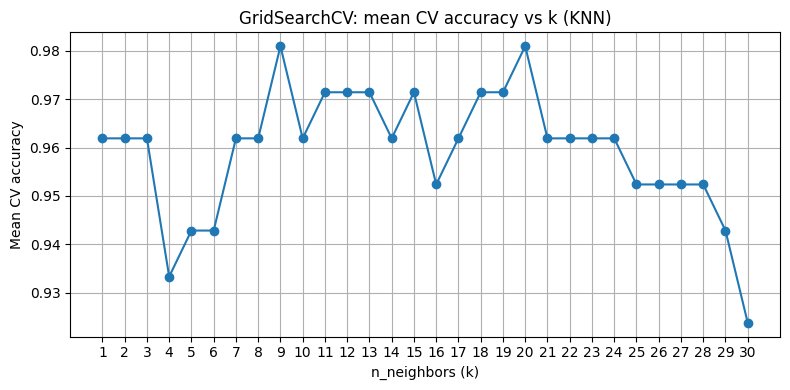

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from IPython.display import display

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_grid = {'n_neighbors': list(range(1,31))}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_

cv_results = pd.DataFrame(grid.cv_results_)[['param_n_neighbors', 'mean_test_score', 'std_test_score', 'mean_train_score', 'rank_test_score']]
cv_results = cv_results.sort_values('param_n_neighbors').reset_index(drop=True)

print("Best parameters:", best_params)
print(f"Best CV accuracy: {best_score:.4f}")
display(cv_results)
test_pred = best_estimator.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print(f"Test accuracy with best estimator: {test_acc:.4f}")
print("Classification report:\n", classification_report(y_test, test_pred, target_names=target_names, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, test_pred))

plt.figure(figsize=(8,4))
plt.plot(cv_results['param_n_neighbors'].astype(int), cv_results['mean_test_score'], marker='o')
plt.title("GridSearchCV: mean CV accuracy vs k (KNN)")
plt.xlabel("n_neighbors (k)")
plt.ylabel("Mean CV accuracy")
plt.xticks(cv_results['param_n_neighbors'].astype(int))
plt.grid(True)
plt.tight_layout()
plt.show()